In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob
import math

In [2]:
data_directory = '/projects/b1118/miniscope/analysis/spatial_data/spatial_clustering/jones_script_analysis/'
data_directory_ko = '/projects/b1118/miniscope/analysis/spatial_data/spatial_clustering/jones_script_analysis/'

In [13]:
#'GRIN034_H16_M13_S22'
Vehicle_sessions = ['Vehicle_DIO_r2.8_16_45_11', 'Vehicle_DIO_r2.14_17_25_26',
                   'Vehicle_DIO_r2.14_17_40_46', 'Vehicle_DIO_r2.14_18_11_01'] ; 
#'GRIN018_H16_M13_S53'
Fenobam_sessions = ['Fenobam_DIO_r2.8_16_30_39', 'Vehicle_DIO_r2.14_17_40_46',
                   'Fenobam_DIO_r2.14_14_00_13'] ;

## compile and plot genotype data

In [14]:
#compile in dictionaries
#might need to shift matlab pair inidcies due to 1-indexing
jaccard_analysis_by_session_veh = {}
for session in Vehicle_sessions:
    print(session)
    session_output = {}
    for file in glob.glob(data_directory+'/'+session+'*normlBinnedCellJaccards.csv'):
        session_output[file.split('_')[-1][:-4]] = pd.read_csv(file, header=None)
    jaccard_analysis_by_session_veh[session] = session_output
    
#compile in dictionaries
#might need to shift matlab pair inidcies due to 1-indexing
jaccard_analysis_by_session_drug = {}
for session in Fenobam_sessions:
    print(session)
    session_output = {}
    for file in glob.glob(data_directory_ko+'/'+session+'*normlBinnedCellJaccards.csv'):
        session_output[file.split('_')[-1][:-4]] = pd.read_csv(file, header=None)
    jaccard_analysis_by_session_drug[session] = session_output

Vehicle_DIO_r2.8_16_45_11
Vehicle_DIO_r2.14_17_25_26
Vehicle_DIO_r2.14_17_40_46
Vehicle_DIO_r2.14_18_11_01
Fenobam_DIO_r2.8_16_30_39
Vehicle_DIO_r2.14_17_40_46
Fenobam_DIO_r2.14_14_00_13


In [15]:
jaccard_analysis_by_session_veh

{'Vehicle_DIO_r2.8_16_45_11': {'normlBinnedCellJaccards':        0      1       2       3        4       5       6       7       8   \
  0  28.378  12.45  5.5438  5.2125  0.94983  2.7731  1.7947  1.1236  1.6026   
  
         9   ...       14      15      16      17      18     19      20  21  \
  0  2.2154  ...  0.70215  5.0043  5.0484  6.4134  2.4684  3.117  2.3109 NaN   
  
     22  23  
  0 NaN NaN  
  
  [1 rows x 24 columns]},
 'Vehicle_DIO_r2.14_17_25_26': {'normlBinnedCellJaccards':        0       1       2       3       4      5      6       7       8   \
  0  10.022  6.8422  5.1275  5.0731  5.0286  4.573  3.416  4.0565  3.7497   
  
         9   ...      14      15      16       17       18      19       20  \
  0  3.6167  ...  2.8151  4.1601  2.2517  0.47824  0.93252  1.5767  0.86369   
  
         21  22  23  
  0  2.7029 NaN NaN  
  
  [1 rows x 24 columns]},
 'Vehicle_DIO_r2.14_17_40_46': {'normlBinnedCellJaccards':        0       1       2       3       4       5       6

In [16]:
#plot across sessions
vehicle_compiled = pd.concat([jaccard_analysis_by_session_veh[session]['normlBinnedCellJaccards'] for session in Vehicle_sessions], keys=Vehicle_sessions)
fenobam_compiled = pd.concat([jaccard_analysis_by_session_drug[session]['normlBinnedCellJaccards'] for session in Fenobam_sessions], keys=Fenobam_sessions)

In [17]:
#genotype_compiled_ko

In [18]:
#average multiple sessions by time

#wt 
#wt_by_day = {}
#wt_by_day = pd.concat(wt_by_day.values(), keys=wt_by_day.keys())

#ko 
#ko_by_day = {}
#ko_by_day = pd.concat(ko_by_day.values(), keys=ko_by_day.keys())

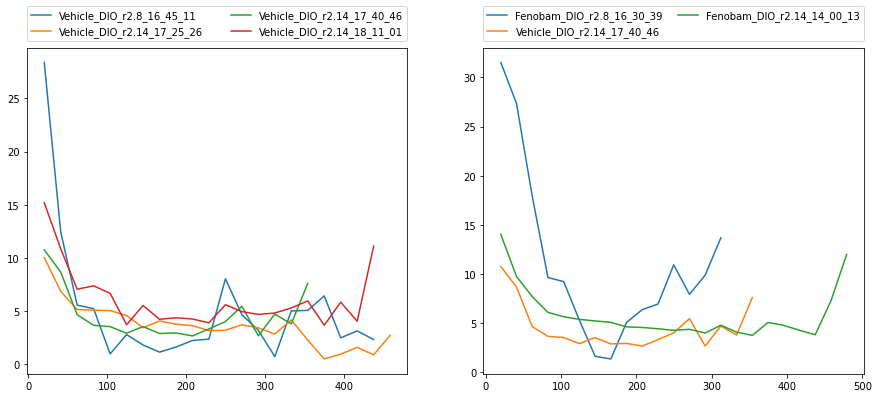

In [19]:
fig = plt.figure()
plt.subplot(1, 2, 1)

for session in range(len(vehicle_compiled)):
    bin_vector = np.linspace(20, 500, len(vehicle_compiled.iloc[session,:].values))
    plt.plot(bin_vector, vehicle_compiled.iloc[session,:].values, label=list(vehicle_compiled.index)[session][0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)

plt.subplot(1, 2, 2)

for session in range(len(fenobam_compiled)):
    bin_vector = np.linspace(20, 500, len(fenobam_compiled.iloc[session,:].values))
    plt.plot(bin_vector, fenobam_compiled.iloc[session,:].values, label=list(fenobam_compiled.index)[session][0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)
#fig.savefig('/projects/b1118/miniscope/analysis/summaryfigures/coactivity_data_bysession_sidebyside_indiv_creoff.pdf', transparent=True)
plt.show()

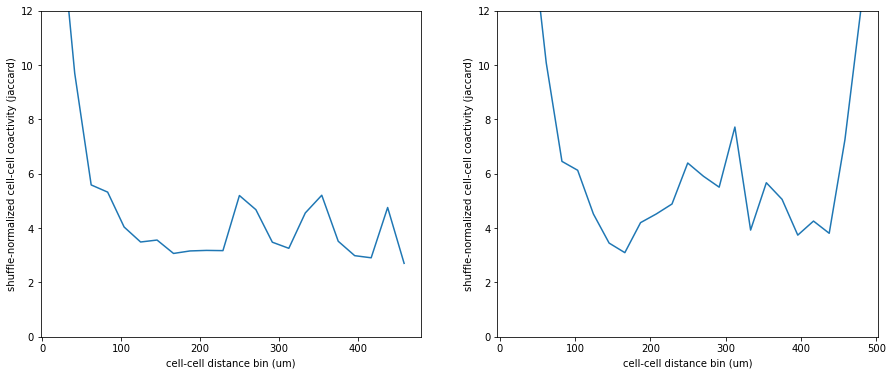

In [20]:
#plot average for genotype
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.plot(bin_vector, vehicle_compiled.mean())
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,12))
#plot average for genotype
plt.subplot(1, 2, 2)
plt.plot(bin_vector, fenobam_compiled.mean())
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,12))


fig.set_size_inches(15, 6)
fig.savefig('/projects/b1118/miniscope/analysis/summaryfigures/coactivity_data_sidebyside_group_creoff.pdf', transparent=True)
plt.show()

## compile ko data

## overlay ko and wt 

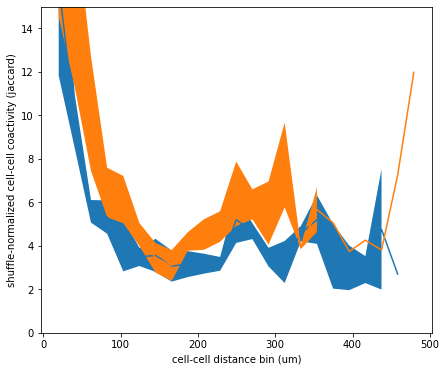

In [21]:
mean = vehicle_compiled.mean()
mean_ko = fenobam_compiled.mean()
std_error = vehicle_compiled.std()/math.sqrt(4)
std_error_ko = fenobam_compiled.std()/math.sqrt(7)
plt.plot(bin_vector, mean)
plt.plot(bin_vector, mean_ko)
plt.fill_between(bin_vector, mean-std_error, mean+std_error)
plt.fill_between(bin_vector, mean_ko-std_error_ko, mean_ko+std_error_ko)
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,15))
fig = plt.gcf()
fig.set_size_inches(7, 6)
#fig.savefig('/projects/b1118/miniscope/analysis/summaryfigures/combined_coactivity_creoff.pdf', transparent=True)
plt.show()